# Working with the real data:

When you are learning about Machine Learning it is best to actually experiment with real-world data, not just artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. Here are a few places you can look to get data:
- http://archive.ics.uci.edu/ml/
- https://www.kaggle.com/datasets
- https://registry.opendata.aws/
- http://dataportals.org/
- http://opendatamonitor.eu/
- http://quandl.com/
- https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public
- https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
- https://www.reddit.com/r/datasets/



#  The California Housing Prices dataset 
from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We also added a categorical attribute and removed a few features for teaching purposes.

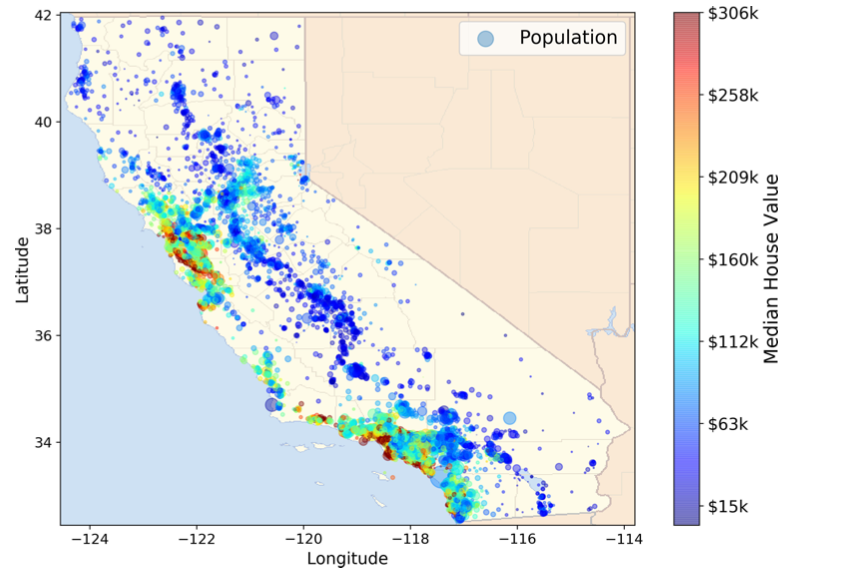


So we have California home cost data available and we want to create a predictive model to predict the cost of a home based on its attributes, based on the data in this dataset.
It is therefore a supervised learning task, to be exact Regression.

# Pipeline : 

A sequence of data processing components is called a data pipeline. Pipelines are very common in Machine Learning systems, since there is a lot of data to manipulate and many data transformations to apply.

Let's define a pipeline: what are the steps to take to create my predictive model?

## 1. Performance Measures 
Select a performance measure, here we  present RMSE and MAE : both are ways to measure the distance between two vectors (the vector of predictions and the vector of target values).

### Root Mean Square Error
A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors. 

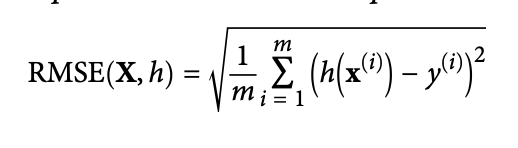




### Mean Absolute Error 

Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. For example, suppose that there are many outlier districts. In that case, you may consider using the Mean Absolute Error 

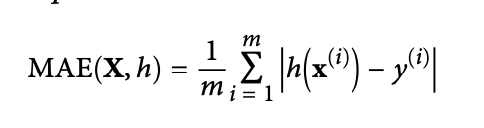


##  2. Download the Data
when you call fetch_housing_data(), it creates a datasets/housing directory in your workspace, downloads the housing.tgz file, and extracts the housing.csv from it in this directory.

In [142]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

## 3. Load the Data
Now let’s load the data using Pandas. Once again you should write a small function to load the data. This function returns a Pandas DataFrame object containing all the data.

In [144]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH): 
        csv_path = os.path.join(housing_path, "housing.csv")
        return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure
Let’s take a look at the top five rows using the DataFrame’s head() method.

In [145]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Each row represents one district. There are 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bed rooms, population, households, median_income, median_house_value, and ocean_proximity.

The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [146]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the total_bed rooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. You can find out what cate‐ gories exist and how many districts belong to each category by using the value_counts() method:

In [147]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let’s look at the other fields. The describe() method shows a summary of the numerical attributes.

In [148]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation, which measures how dispersed the values are. 

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. 

For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A **histogram** shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute (see Figure 2-8). For example, you can see that slightly over 800 districts have a median_house_value equal to about $100,000.

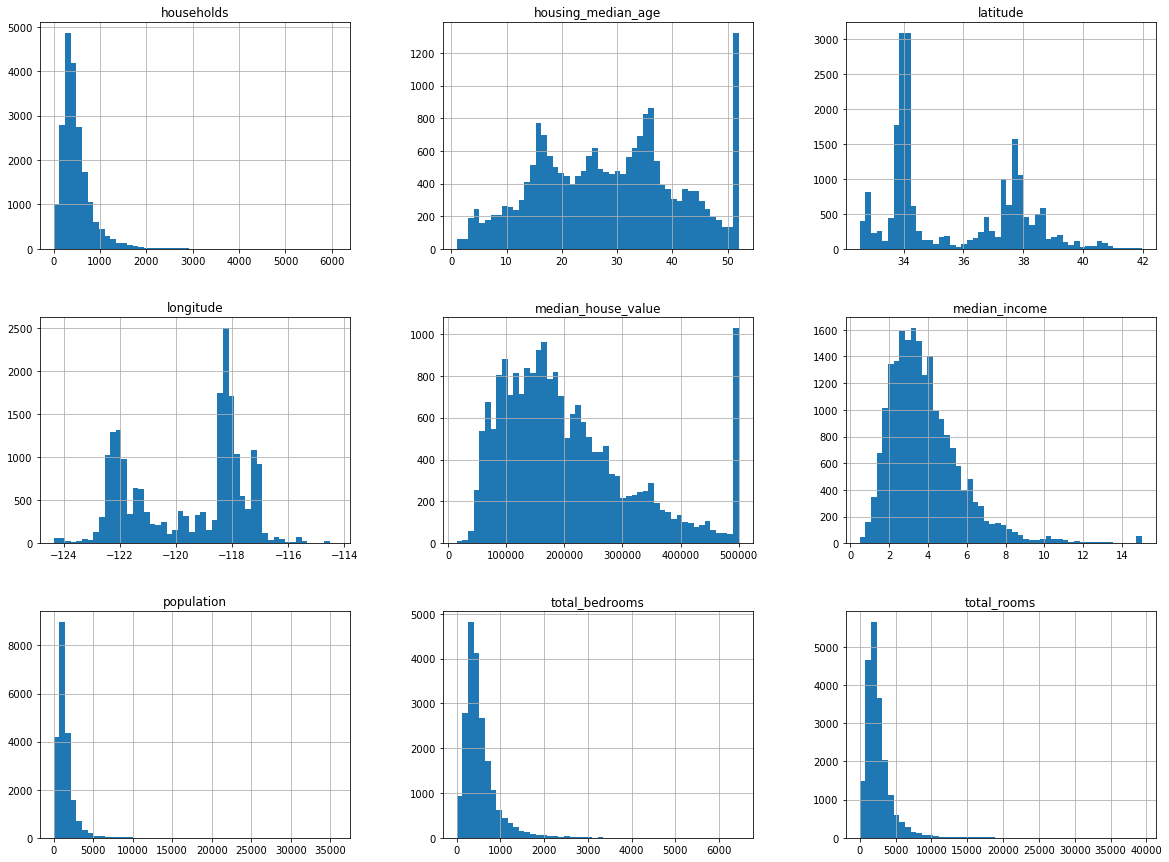

In [149]:
%matplotlib inline 
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15)) 
plt.show()

The hist() method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. So before you can plot anything, you need to specify which backend Matplotlib should use. 

The simplest option is to use Jupyter’s magic command %matplotlib inline. This tells Jupyter to set up Matplotlib so it uses Jupyter’s own backend. Plots are then rendered within the notebook itself. 

Note that calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

# 4. Create a test set 

Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [153]:
shuf = np.random.permutation(len(data))
shuf

array([12148,  5862,  4275, ...,  1132, 19227, 16961])

In [154]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # extract all the indexes
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size]  # select the first 20% of indexes 
    train_indices = shuffled_indices[test_set_size:]   # select the remaining 80% of indexes 
    return data.iloc[train_indices], data.iloc[test_indices]

In [157]:
train_set, test_set = split_train_test(housing, 0.2) 
print(len(housing))
print(len(train_set))
print(len(test_set))

print(len(housing) * 0.8)

20640
16512
4128
16512.0


In [20]:
print(len(housing))

20640


In [21]:
20640*20/100

4128.0

Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid. One solution is to save the test set on the first run and then load it in subsequent runs. Another option is to set the random number generator’s seed (e.g., np.random.seed(42)) before calling np.random.permutation(), so that it always generates the same shuffled indices.

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways:

In [165]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# 5. Visualize the Data 

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data:

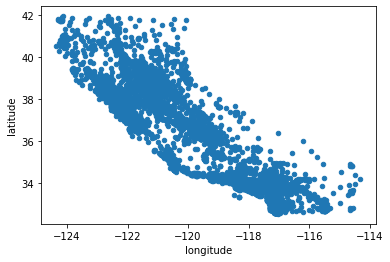

In [166]:
housing.plot(kind="scatter", x="longitude", y="latitude")


This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points:


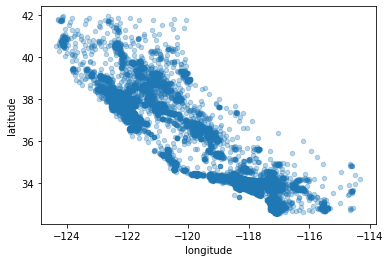

In [167]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)

Now let’s look at the housing prices. The radius of each circle represents the district’s population (parameter s), and the color represents the price (parameter c). 

We will use a predefined color map (parameter cmap) called jet, which ranges from blue (low values) to red (high prices):

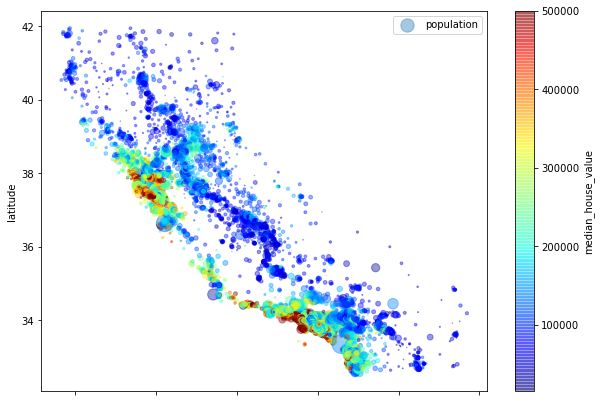

In [168]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    )
plt.legend()

# Correlation matrix

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method.

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation. 

In [169]:
import pandas as pd
import numpy as np

corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm')  # only lower/upper triangle 

In [28]:
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [170]:
corr["total_rooms"].sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.930380
households            0.918484
population            0.857126
median_income         0.198050
median_house_value    0.134153
longitude             0.044568
latitude             -0.036100
housing_median_age   -0.361262
Name: total_rooms, dtype: float64

# Prepare the Data for Machine Learning Algorithms

But first let’s revert to a clean training set (by copying strat_train_set once again), and let’s separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set):

In [171]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

# Data Cleaning 
Most Machine Learning algorithms cannot work with missing features (null), so let’s create a few functions to take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. 

You have three options: 

- Get rid of the corresponding districts.  (Drop only raws with zero values)
- Get rid of the whole attribute. (Drop the column)
- Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna() methods:

In [114]:
housing.dropna(subset=["total_bedrooms"]) # option 1 
housing.drop("total_bedrooms", axis=1) # option 2 
median = housing["total_bedrooms"].median() # option 3 
housing["total_bedrooms"].fillna(median, inplace=True)

In [172]:
housing = housing.drop("total_bedrooms", axis=1) # option 2 

If you choose option 3, you should compute the median value on the training set, and use it to fill the missing values in the training set, but also don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data.

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. Here is how to use it. First, you need to create a SimpleImputer instance, specifying youu want the madian of each attribute:

In [99]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

Now you can fit the imputer instance to the training data using the fit() method:

In [41]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [42]:
stat = imputer.statistics_
stat

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [43]:
np.set_printoptions(suppress=True)   # suppress scientific annotation
stat

array([  -118.49  ,     34.26  ,     29.    ,   2127.    ,    435.    ,
         1166.    ,    409.    ,      3.5348, 179700.    ])

# Handling Text and Categorical Attributes
Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median:

In [173]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

ocean_proximity
14196      NEAR OCEAN
8267       NEAR OCEAN
17445      NEAR OCEAN
14265      NEAR OCEAN
2271           INLAND
...               ...
11284       <1H OCEAN
11964          INLAND
5390        <1H OCEAN
860         <1H OCEAN
15795        NEAR BAY

[16512 rows x 1 columns]

Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class

In [45]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) 
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [46]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
set(housing_cat_encoded.flat)

{0.0, 1.0, 2.0, 3.0, 4.0}

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). 

To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. 

This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors:



In [175]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) 
housing_cat_1hot.shape

(16512, 5)

In [51]:
housing_cat_1hot.shape

(20640, 5)

In [64]:
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

Examples of quality feature as the color of the eyes! 

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:


In [176]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [72]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [73]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY","<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test)

ocean_proximity_<2H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       1                       0   
1                          0                       0                       0   
2                          1                       0                       0   
3                          0                       0                       1   

   ocean_proximity_NEAR BAY  
0                         0  
1                         1  
2                         0  
3                         0

In [177]:
data = housing_cat_1hot.toarray()

In [178]:
data[:, 0].shape

(16512,)

In [179]:
cat_data = pd.DataFrame({'OCEAN': data[:, 0], 'INLAND': data[:, 1], 'ISLAND': data[:, 2], 'NEAR BAY': data[:, 3], 'NEAR OCEAN': data[:, 4]})

cat_data


OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0        0.0     0.0     0.0       0.0         1.0
1        0.0     0.0     0.0       0.0         1.0
2        0.0     0.0     0.0       0.0         1.0
3        0.0     0.0     0.0       0.0         1.0
4        0.0     1.0     0.0       0.0         0.0
...      ...     ...     ...       ...         ...
16507    1.0     0.0     0.0       0.0         0.0
16508    0.0     1.0     0.0       0.0         0.0
16509    1.0     0.0     0.0       0.0         0.0
16510    1.0     0.0     0.0       0.0         0.0
16511    0.0     0.0     0.0       1.0         0.0

[16512 rows x 5 columns]

In [180]:
housing_num_cat = housing_num 

In [183]:
housing_num_cat

longitude  latitude  housing_median_age  total_rooms  population  \
0        -122.23     37.88                41.0        880.0       322.0   
1        -122.22     37.86                21.0       7099.0      2401.0   
2        -122.24     37.85                52.0       1467.0       496.0   
3        -122.25     37.85                52.0       1274.0       558.0   
4        -122.25     37.85                52.0       1627.0       565.0   
...          ...       ...                 ...          ...         ...   
20635    -121.09     39.48                25.0       1665.0       845.0   
20636    -121.21     39.49                18.0        697.0       356.0   
20637    -121.22     39.43                17.0       2254.0      1007.0   
20638    -121.32     39.43                18.0       1860.0       741.0   
20639    -121.24     39.37                16.0       2785.0      1387.0   

       households  median_income  median_house_value  OCEAN  INLAND  ISLAND  \
0           126.0         8.3252            452600.0    0.0     0.0     0.0   
1          1138.0         8.3014            358500.0    0.0     0.0     0.0   
2           177.0         7.2574            352100.0    0.0     0.0     0.0   
3           219.0         5.6431            341300.0    0.0     0.0     0.0   
4           259.0         3.8462            342200.0    0.0     0.0     0.0   
...           ...            ...                 ...    ...     ...     ...   
20635       330.0         1.5603             78100.0    0.0     1.0     0.0   
20636       114.0         2.5568             77100.0    0.0     1.0     0.0   
20637       433.0         1.7000             92300.0    0.0     1.0     0.0   
20638       349.0         1.8672             84700.0    0.0     1.0     0.0   
20639       530.0         2.3886             89400.0    0.0     1.0     0.0   

       NEAR BAY  NEAR OCEAN  
0           1.0         0.0  
1           1.0         0.0  
2           1.0         0.0  
3           1.0         0.0  
4           1.0         0.0  
...         ...         ...  
20635       0.0         0.0  
20636       0.0         0.0  
20637       0.0         0.0  
20638       0.0         0.0  
20639       0.0         0.0  

[20640 rows x 13 columns]

In [ ]:
housing_num_cat['OCEAN'] = data[:, 0]
housing_num_cat['INLAND'] = data[:, 1]
housing_num_cat['ISLAND'] = data[:, 2]
housing_num_cat['NEAR BAY'] = data[:, 3]
housing_num_cat['NEAR OCEAN'] = data[:, 4]

housing_num_cat

In [182]:
housing_num_cat.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

# Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.
There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

**Min-max scaling** (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

**Standardization** is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.

# Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
            ('std_scaler', StandardScaler()),
        ])

housing_prepared = num_pipeline.fit_transform(housing_num_cat)
housing_prepared.shape

(20640, 13)

In [185]:
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])


# NAIVE BAYES 

In [187]:
h_data = housing_num_cat
train_set, test_set = split_train_test(h_data, 0.2) 

In [188]:
h_data.shape

(20640, 13)

In [192]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [193]:
test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [194]:
train_set_data = train_set.drop("median_house_value", axis=1)
train_set_label = train_set[["median_house_value"]]  
test_set_data = test_set.drop("median_house_value", axis=1)
test_set_label = test_set[["median_house_value"]]

In [200]:
test_set_label.shape

(4128, 1)

In [197]:
train_set_label.shape

(16512, 1)

In [196]:
train_set.shape

(16512, 13)

In [202]:
train_set_data = num_pipeline.fit_transform(train_set_data)
test_set_data = num_pipeline.fit_transform(test_set_data)

In [205]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(train_set_data, train_set_label.values.ravel())

#train_y.values.ravel()

#Predict the response for test dataset
y_pred = gnb.predict(test_set_data)

In [206]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_set_label, y_pred))

Accuracy: 0.03948643410852713


In [186]:
h_data = housing_num_cat
train_set, test_set = split_train_test(h_data, 0.2) 

train_set_data = train_set.drop("median_house_value", axis=1)
train_set_label = train_set[["median_house_value"]]  
test_set_data = test_set.drop("median_house_value", axis=1)
test_set_label = test_set[["median_house_value"]]


train_set_data = num_pipeline.fit_transform(train_set_data)
test_set_data = num_pipeline.fit_transform(test_set_data)


#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

NameError: name 'X_train' is not defined

## Evaluating Model
After model generation, check the accuracy using actual and predicted values.

In [39]:




#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


# Select and Train a Model

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data. The code should look familiar by now:

In [133]:
h_data = housing_num_cat

In [134]:
train_set, test_set = split_train_test(h_data, 0.2) 

In [135]:
train_set_data = train_set.drop("median_house_value", axis=1)
train_set_label = train_set[["median_house_value"]]  
test_set_data = test_set.drop("median_house_value", axis=1)
test_set_label = test_set[["median_house_value"]]

In [136]:
train_set_data = num_pipeline.fit_transform(train_set_data)
test_set_data = num_pipeline.fit_transform(test_set_data)

In [137]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_data, train_set_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [138]:
from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(test_set_data)
tree_mse = mean_squared_error(test_set_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

70697.85765958912

In [139]:
tree_mse

4998187077.655523

The error is really high, but it also depends by the classifier, the  random seed, data training and so may features.

The best result is near 0.

# Better Evaluation Using Cross-Validation
One way to evaluate the Decision Tree model would be to use the train_test_split function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the vali‐ dation set. It’s a bit of work, but nothing too difficult and it would work fairly well.

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array con‐ taining the 10 evaluation scores:

In [140]:
from sklearn.model_selection import cross_val_score

data = h_data.drop("median_house_value", axis=1)
label = h_data[["median_house_value"]]  
data_scale = num_pipeline.fit_transform(data)

scores = cross_val_score(tree_reg, data_scale, label, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [141]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [140737.53674672  70108.47236819 104066.3535419   78374.09498279
  86268.27285416  81490.52917731  78853.6598763  107586.30154808
 107099.52800012  73321.54515714]
Mean: 92790.62942526951
Standard deviation: 20773.87504880506
